Link to Excel file of extracted features: https://drive.google.com/drive/u/1/folders/1ZMbW7HxNkBUAlnT-_lXLD4J_r0A778SJ

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


In [2]:
# read in features csv file
df = pd.read_csv('v2_chi_features.csv')
df

,Abs LFP,Abs HFP,nLFP,nHFP,LF/HF,RMSSD,label
0,3249.551607,8043.922163,0.271662,0.672470,0.403976,932.714731,chi_pre
1,2022.717898,6829.397915,0.219590,0.741411,0.296178,803.437128,chi_pre
2,2378.753676,6678.590063,0.256223,0.719372,0.356176,793.228617,chi_pre
3,2431.402950,7008.622545,0.243283,0.701272,0.346916,865.589904,chi_pre
4,1897.800009,7150.309660,0.197731,0.744987,0.265415,852.451001,chi_pre
...,...,...,...,...,...,...,...
187,1693.857757,6516.909783,0.191976,0.738605,0.259917,594.503335,chi_med
188,1613.491859,7337.618074,0.169943,0.772843,0.219893,600.640777,chi_med
189,1733.558801,7194.855491,0.181528,0.753402,0.240944,594.669282,chi_med
190,1663.587060,6455.282349,0.193467,0.750719,0.257709,582.797211,chi_med


<AxesSubplot:>

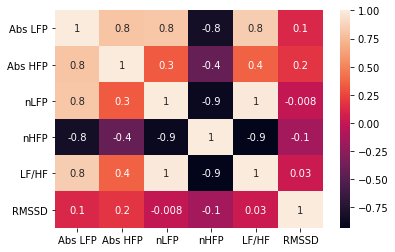

In [3]:
# df.corr()
sns.heatmap(df.corr(), annot = True, fmt='.1g')

In [4]:
# target variables
Y = df['label'].values
# features
X = df.drop(labels = ['label'], axis = 1)

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [5]:
arr = ["{}{}".format("PC", i) for i in np.arange(np.shape(df)[1]-1)+ 1]
(np.shape(df)[1]-1)+ 1
arr

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=arr)
dfp = pd.merge(df, pca_df, right_index=True, left_index=True)
print('Explained Variance Ratio')
for i in range(len(arr)):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

Explained Variance Ratio
PC1: 0.6618084710331151
PC2: 0.18493542170546245
PC3: 0.1329748840933125
PC4: 0.0186660442423757
PC5: 0.0014985543466954634
PC6: 0.00011662457903880055


In [7]:
pca = PCA(.99)
X_pca = pca.fit_transform(X)
print('Explained Variance Ratio')
for i in range(len(arr)):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

Explained Variance Ratio
PC1: 0.6618084710331151
PC2: 0.18493542170546245
PC3: 0.1329748840933125
PC4: 0.0186660442423757


IndexError: index 4 is out of bounds for axis 0 with size 4

In [10]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC3','PC4'])
principalDf

,PC1,PC2,PC3,PC4
0,4.238770,-0.472429,-1.904480,0.064923
1,-0.283084,0.324751,-0.968140,0.283747
2,1.530707,1.076818,-1.533644,0.602195
3,1.709424,0.160128,-1.788562,-0.088482
4,-0.989122,-0.579753,-0.827840,-0.091230
...,...,...,...,...
187,-1.568339,1.992568,0.409068,-0.777623
188,-2.726248,1.115597,1.439640,-0.353071
189,-1.949557,1.461724,1.118134,-0.607236
190,-1.815704,2.101626,0.526825,-0.429289


In [11]:
finalDf = pd.concat([principalDf, df['label']], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,label
0,4.238770,-0.472429,-1.904480,0.064923,chi_pre
1,-0.283084,0.324751,-0.968140,0.283747,chi_pre
2,1.530707,1.076818,-1.533644,0.602195,chi_pre
3,1.709424,0.160128,-1.788562,-0.088482,chi_pre
4,-0.989122,-0.579753,-0.827840,-0.091230,chi_pre
...,...,...,...,...,...
187,-1.568339,1.992568,0.409068,-0.777623,chi_med
188,-2.726248,1.115597,1.439640,-0.353071,chi_med
189,-1.949557,1.461724,1.118134,-0.607236,chi_med
190,-1.815704,2.101626,0.526825,-0.429289,chi_med


In [12]:
# save to a csv file
finalDf.to_csv('v2_chi_pca_features.csv',index=False)